In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [9]:
sample1 = pd.read_excel('Clouds-+18Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample1)

sample2 = pd.read_excel('Clouds-13to18Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample2)

sample3 = pd.read_excel('Clouds-U13Competition.xlsx', usecols= "C,D,F,I,K,L,M,O")
#print(sample3)

rows1 = len(sample1)
rows2 = len(sample2)
rows3 = len(sample3)

In [4]:
def LevelCheck (level, T, F):
    if level == 2:
        if (T+F) == 2:
            return 1
        else:
            return False
    elif level == 4:
        if (T+F) == 3:
            return 2
        else:
            return False
    elif level == 7:
        if (T+F) == 4:
            return 3
        else:
            return False
    elif level == 8:
        if (T+F) == 4:
            return 4
        else:
            return False
    elif level == 11:
        if (T+F) == 5:
            return 5
        else:
            return False

In [5]:
def levels_accuracy(sample, rows):
    LevelsAccSum = np.zeros(5)  #the sum of accuracy for each level
    LevelNum = np.zeros(5)      #for counting each level's num

    for i in range(rows):
        level = int(sample.iloc[i ,1])
        T = int(sample.iloc[i, 4])
        F = int(sample.iloc[i, 5])
        
        LIndex = LevelCheck(level, T, F)        #if the level is completed, it gets the index of the level [2,4,7,8,11]
        if LIndex:
            Acc = T / (T+F)
            LevelNum[(LIndex-1)] += 1  
            LevelsAccSum[(LIndex-1)] += Acc
        
    LevelsAcc = [LevelsAccSum[i]/LevelNum[i] for i in range(5) ]
    return LevelsAcc
    #print(LevelsAcc)

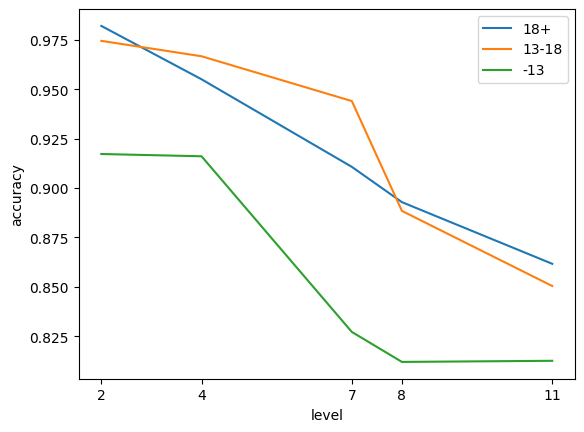

In [6]:
levelsAcc1 = levels_accuracy(sample1, rows1)
levelsAcc2 = levels_accuracy(sample2, rows2)
levelsAcc3 = levels_accuracy(sample3, rows3)
levels = [2, 4, 7, 8, 11]
plt.plot(levels, levelsAcc1, label = "18+")
plt.plot(levels, levelsAcc2, label = "13-18")
plt.plot(levels, levelsAcc3, label = "-13")
plt.legend()
plt.xlabel("level")
plt.ylabel("accuracy")
plt.xticks([2, 4, 7, 8, 11])
plt.show()